<a href="https://colab.research.google.com/github/FerRamirez-cpu/challenge-data-science/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [5]:
# Calculando el total por tienda
total_ingresos_tienda  = tienda["Precio"].sum()
total_ingresos_tienda2 = tienda2["Precio"].sum()
total_ingresos_tienda3 = tienda3["Precio"].sum()
total_ingresos_tienda4 = tienda4["Precio"].sum()

print(f"El total de ingresos de la tienda 1 es: {total_ingresos_tienda}, tienda 2 es: {total_ingresos_tienda2}, el de la tienda 3 es: {total_ingresos_tienda3}y de la tienda 4 es: {total_ingresos_tienda4}")

El total de ingresos de la tienda 1 es: 1150880400.0, tienda 2 es: 1116343500.0, el de la tienda 3 es: 1098019600.0y de la tienda 4 es: 1038375700.0


In [ ]:
import matplotlib.pyplot as plt

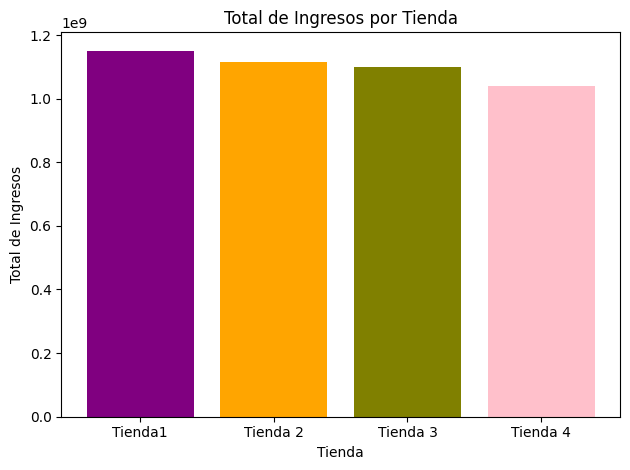

In [6]:
nombres_tiendas = ["Tienda1", "Tienda 2", "Tienda 3", "Tienda 4"]
ingresos = [total_ingresos_tienda, total_ingresos_tienda2, total_ingresos_tienda3, total_ingresos_tienda4]

colores = ['purple', 'orange', 'olive', 'pink']
plt.bar(nombres_tiendas, ingresos,color=colores)
plt.title("Total de Ingresos por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Total de Ingresos")
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [7]:
# Agrupar por categoría y sumar la venta por cada tienda para el analisis
ventas_por_categoria_t1 = tienda.groupby("Categoría del Producto")["Precio"].sum()
ventas_por_categoria_t2 = tienda2.groupby("Categoría del Producto")["Precio"].sum()
ventas_por_categoria_t3 = tienda3.groupby("Categoría del Producto")["Precio"].sum()
ventas_por_categoria_t4 = tienda4.groupby("Categoría del Producto")["Precio"].sum()

print(ventas_por_categoria_t1)
print(ventas_por_categoria_t2)
print(ventas_por_categoria_t3)
print(ventas_por_categoria_t4)

Categoría del Producto
Artículos para el hogar     12698400.0
Deportes y diversión        39290000.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Instrumentos musicales      91299000.0
Juguetes                    17995700.0
Libros                       8784900.0
Muebles                    187633700.0
Name: Precio, dtype: float64
Categoría del Producto
Artículos para el hogar     14746900.0
Deportes y diversión        34744500.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Instrumentos musicales     104990300.0
Juguetes                    15945400.0
Libros                      10091200.0
Muebles                    176426300.0
Name: Precio, dtype: float64
Categoría del Producto
Artículos para el hogar     15060000.0
Deportes y diversión        35593100.0
Electrodomésticos          329237900.0
Electrónicos               410775800.0
Instrumentos musicales      77380900.0
Juguetes                    19401100.0
Libros         

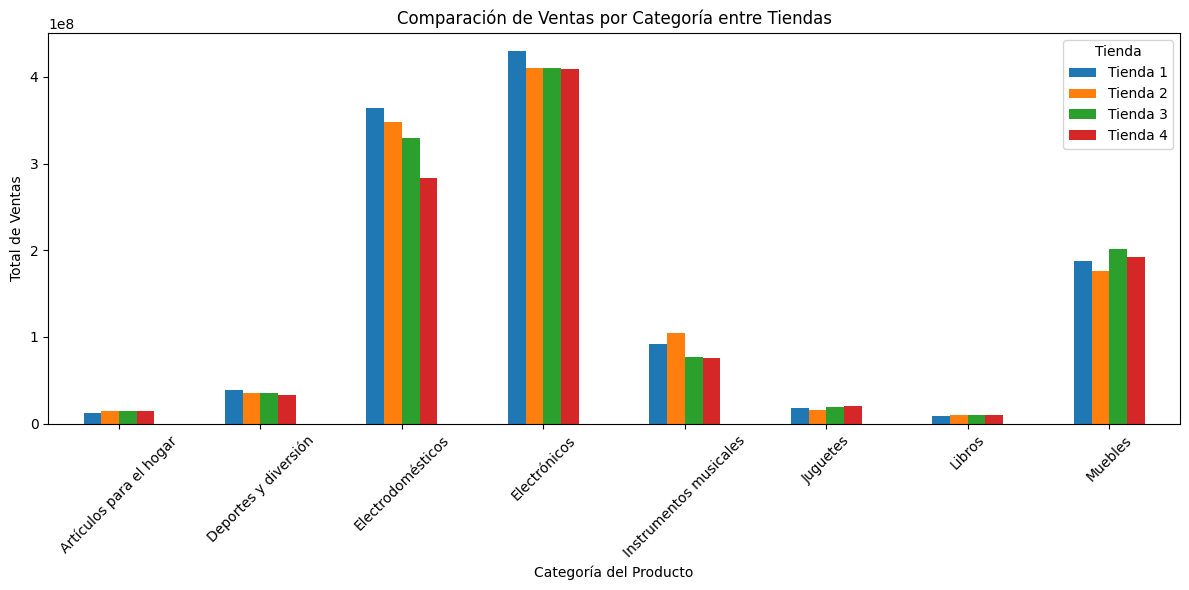

In [8]:
import matplotlib.pyplot as plt

df_comparativo = pd.DataFrame({
    "Tienda 1": ventas_por_categoria_t1,
    "Tienda 2": ventas_por_categoria_t2,
    "Tienda 3":ventas_por_categoria_t3,
    "Tienda 4": ventas_por_categoria_t4
})


df_comparativo = df_comparativo.fillna(0)


df_comparativo.plot(kind="bar", figsize=(12, 6))


plt.title("Comparación de Ventas por Categoría entre Tiendas")
plt.xlabel("Categoría del Producto")
plt.ylabel("Total de Ventas")
plt.xticks(rotation=45)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [9]:
promedio_tienda1 = tienda["Calificación"].mean()
promedio_tienda2 = tienda2["Calificación"].mean()
promedio_tienda3 = tienda3["Calificación"].mean()
promedio_tienda4 = tienda4["Calificación"].mean()

print(f"Promedio de la tienda 1: {promedio_tienda1}")
print(f"Promedio de la tienda 2: {promedio_tienda2}")
print(f"Promedio de la tienda 3: {promedio_tienda3}")
print(f"Promedio de la tienda 4: {promedio_tienda4}")


Promedio de la tienda 1: 3.976685036032217
Promedio de la tienda 2: 4.037303942348453
Promedio de la tienda 3: 4.048325561678677
Promedio de la tienda 4: 3.9957591178965224


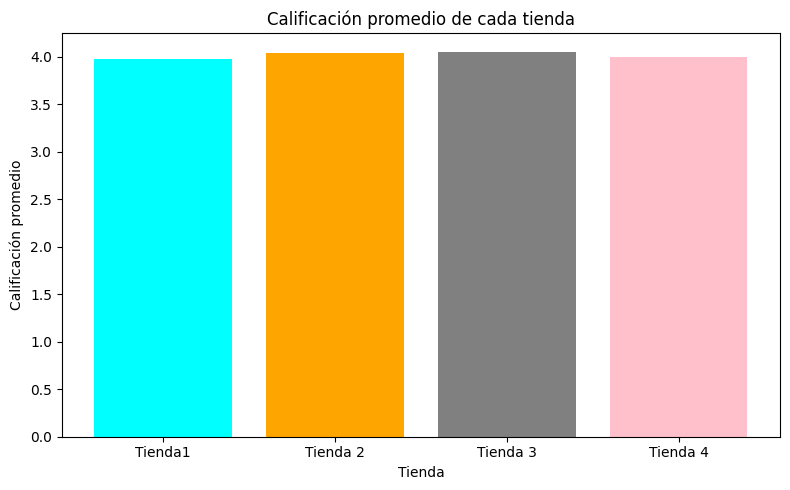

In [15]:
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
promedios = [promedio_tienda1, promedio_tienda2, promedio_tienda3, promedio_tienda4]

plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, promedios, color=['cyan', 'orange', 'gray', 'pink'])

plt.title("Calificación promedio de cada tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [22]:
productos_vendidos_t1 = tienda["Producto"].value_counts()
print("\n Tienda 1 - Productos más vendidos:")
print(productos_vendidos_t1.head())
print("\n Tienda 3 - Productos menos vendidos:")
print(productos_vendidos_t1.tail())

productos_vendidos_t2 = tienda2["Producto"].value_counts()
print("\n Tienda 2 - Productos más vendidos:")
print(productos_vendidos_t2.head())
print("\n Tienda 2 - Productos menos vendidos:")
print(productos_vendidos_t2.tail())

productos_vendidos_t3 = tienda3["Producto"].value_counts()
print("\n Tienda 3 - Productos más vendidos:")
print(productos_vendidos_t3.head())
print("\n Tienda 3 - Productos menos vendidos:")
print(productos_vendidos_t3.tail())

productos_vendidos_t4 = tienda4["Producto"].value_counts()
print("\n Tienda 4 - Productos más vendidos:")
print(productos_vendidos_t4.head())
print("\n Tienda 4 - Productos menos vendidos:")
print(productos_vendidos_t4.tail())


 Tienda 1 - Productos más vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

 Tienda 3 - Productos menos vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

 Tienda 2 - Productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

 Tienda 2 - Productos menos vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

 Tienda 3 - Productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      

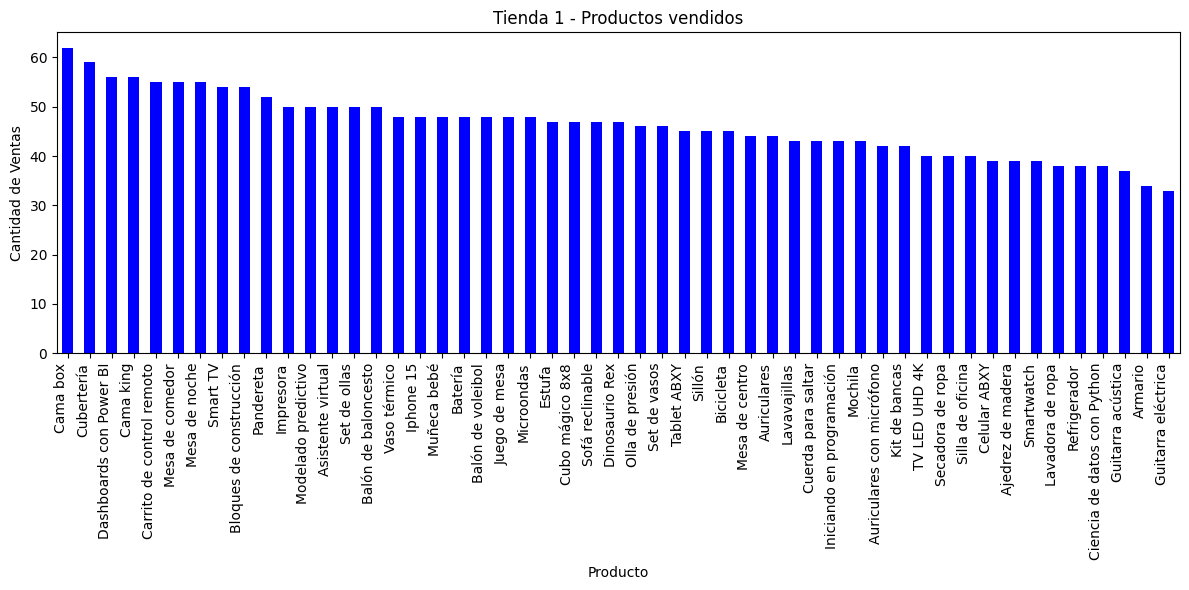

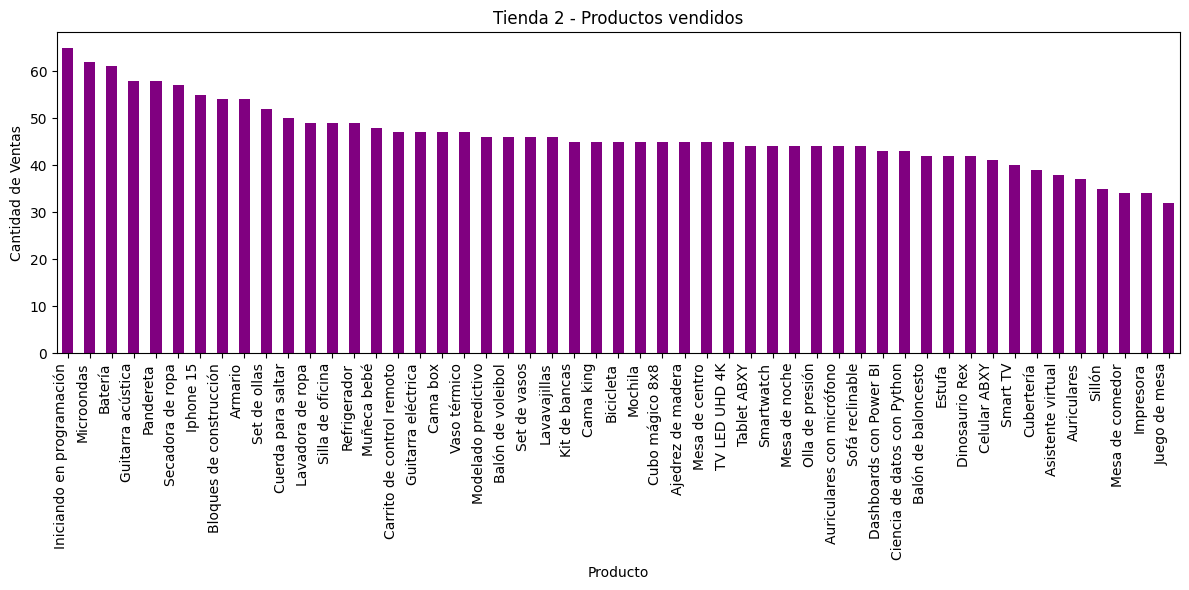

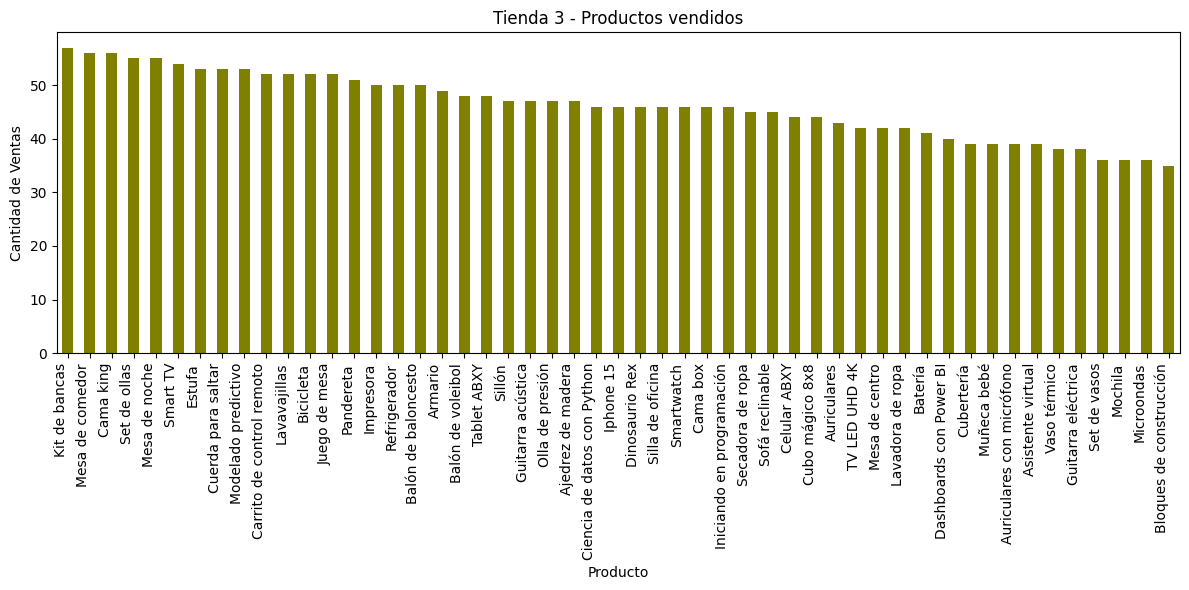

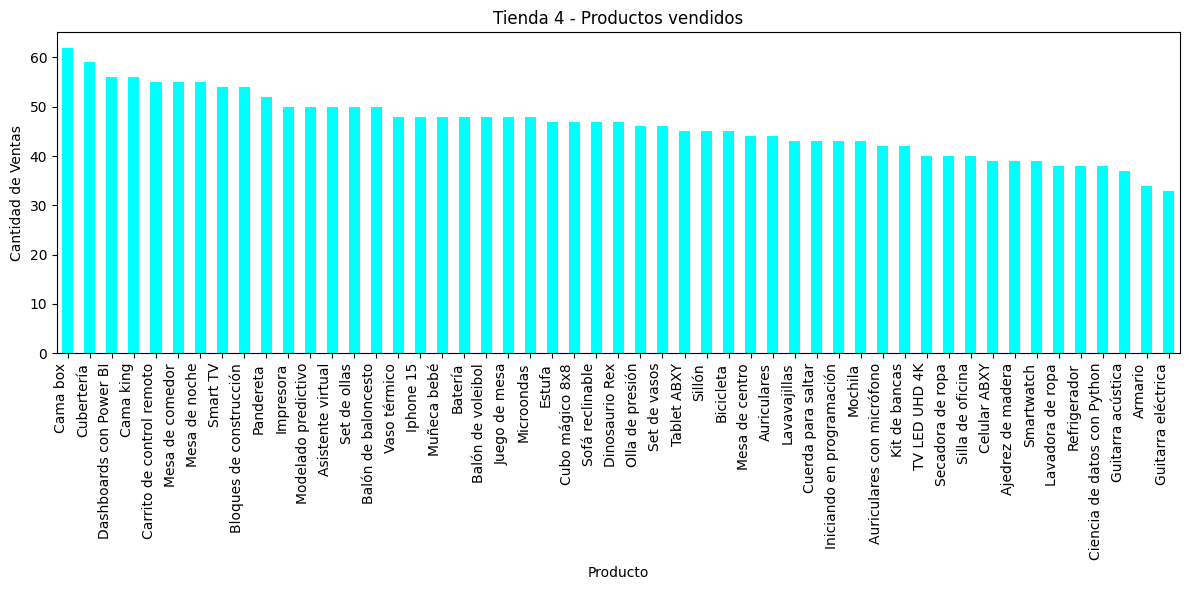

In [31]:
def grafica_productos(productos_vendidos, titulo, color):
    plt.figure(figsize=(12, 6))
    productos_vendidos.sort_values(ascending=False).plot(kind="bar", color=color)
    plt.title(titulo)
    plt.xlabel("Producto")
    plt.ylabel("Cantidad de Ventas")
    plt.xticks(rotation=90, ha="right")
    plt.tight_layout()
    plt.show()

tiendas = [tienda, tienda2, tienda3, tienda4]
colores = ["blue", "purple", "olive", "cyan"]

for i, tienda in enumerate(tiendas, start=1):
    productos_vendidos = tienda["Producto"].value_counts()
    grafica_productos(
        productos_vendidos,
        f"Tienda {i} - Productos vendidos",
        colores[i-1]
    )


# 5. Envío promedio por tienda